# Yelp Data Challenge - Data Preprocessing

BitTiger DS501-1802

May 2018

Yan Wei

## Dataset Introduction

[Yelp Dataset Challenge](https://www.yelp.com/dataset_challenge)

The Challenge Dataset:

    4.1M reviews and 947K tips by 1M users for 144K businesses
    1.1M business attributes, e.g., hours, parking availability, ambience.
    Aggregated check-ins over time for each of the 125K businesses
    200,000 pictures from the included businesses

Cities:

    U.K.: Edinburgh
    Germany: Karlsruhe
    Canada: Montreal and Waterloo
    U.S.: Pittsburgh, Charlotte, Urbana-Champaign, Phoenix, Las Vegas, Madison, Cleveland

Files:

    yelp_academic_dataset_business.json
    yelp_academic_dataset_checkin.json
    yelp_academic_dataset_review.json
    yelp_academic_dataset_tip.json
    yelp_academic_dataset_user.json

Notes on the Dataset

    Each file is composed of a single object type, one json-object per-line.
    Take a look at some examples to get you started: https://github.com/Yelp/dataset-examples.



## Read data from file and load to Pandas DataFrame

**Warning**: Loading all the 1.8 GB data into Pandas at a time takes long time and a lot of memory!

In [12]:
import json
import pandas as pd

In [13]:
file_business, file_checkin, file_review, file_tip, file_user = [
    'dataset/business.json',
    'dataset/checkin.json',
    'dataset/review.json',
    'dataset/tip.json',
    'dataset/user.json'
]

#### Business Data

In [14]:
with open(file_business) as f:
    df_business = pd.DataFrame(json.loads(line) for line in f)

In [15]:
df_business.head(2)

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,"4855 E Warner Rd, Ste B9","{'AcceptsInsurance': True, 'ByAppointmentOnly'...",FYWN1wneV18bWNgQjJ2GNg,"[Dentists, General Dentistry, Health & Medical...",Ahwatukee,"{'Friday': '7:30-17:00', 'Tuesday': '7:30-17:0...",1,33.330690,-111.978599,Dental by Design,,85044,22,4.0,AZ
1,3101 Washington Rd,"{'BusinessParking': {'garage': False, 'street'...",He-G7vWjzVUysIKrfNbPUQ,"[Hair Stylists, Hair Salons, Men's Hair Salons...",McMurray,"{'Monday': '9:00-20:00', 'Tuesday': '9:00-20:0...",1,40.291685,-80.104900,Stephen Szabo Salon,,15317,11,3.0,PA


In [16]:
df_business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174567 entries, 0 to 174566
Data columns (total 15 columns):
address         174567 non-null object
attributes      174567 non-null object
business_id     174567 non-null object
categories      174567 non-null object
city            174567 non-null object
hours           174567 non-null object
is_open         174567 non-null int64
latitude        174566 non-null float64
longitude       174566 non-null float64
name            174567 non-null object
neighborhood    174567 non-null object
postal_code     174567 non-null object
review_count    174567 non-null int64
stars           174567 non-null float64
state           174567 non-null object
dtypes: float64(3), int64(2), object(10)
memory usage: 20.0+ MB


In [17]:
df_business.shape

(174567, 15)

In [24]:
len(df_business['city'].unique())

1094

#### Checkin Data

In [18]:
with open(file_checkin) as f:
    df_checkin = pd.DataFrame(json.loads(line) for line in f)
df_checkin.head(2)

,business_id,time
0,7KPBkxAOEtb3QeIL9PEErg,"{'Thursday': {'21:00': 4, '1:00': 1, '4:00': 1..."
1,kREVIrSBbtqBhIYkTccQUg,"{'Monday': {'13:00': 1}, 'Thursday': {'20:00':..."


In [19]:
df_checkin.shape

(146350, 2)

#### Review Data

In [20]:
with open(file_review, encoding = 'utf8') as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,0W4lkclzZThpx3V65bVgig,0,2016-05-28,0,v0i_UHJMo_hPBq9bxWvW4w,5,"Love the staff, love the meat, love the place....",0,bv2nCi5Qv5vroFiqKGopiw
1,AEx2SYEUJmTxVVB18LlCwA,0,2016-05-28,0,vkVSCC7xljjrAI4UGfnKEQ,5,Super simple place but amazing nonetheless. It...,0,bv2nCi5Qv5vroFiqKGopiw


In [21]:
df_review.shape

(5261669, 9)

#### Tip Data

In [ ]:
# with open(file_tip) as f:
#     df_tip = pd.DataFrame(json.loads(line) for line in f)
# df_tip.head(2)

#### User Data

In [ ]:
# with open(file_user) as f:
#     df_user = pd.DataFrame(json.loads(line) for line in f)
# df_user.head(2)

## Filter data by city and category

#### Create filters/masks

* create filters that selects business 
    * that are located in "Las Vegas"
    * that contains "Restaurants" in their category (You may need to filter null categories first)

In [43]:
# Create Pandas DataFrame filters
condition1 = df_business['city'] == 'Las Vegas'
condition2 = df_business['categories'].apply(str).str.contains('Restaurants')

In [33]:
# Check null values of each column, column 'categories' has no NULL.
df_business.isnull().sum()

address         0
attributes      0
business_id     0
categories      0
city            0
hours           0
is_open         0
latitude        1
longitude       1
name            0
neighborhood    0
postal_code     0
review_count    0
stars           0
state           0
dtype: int64

In [45]:
# Create filtered DataFrame, and name it df_filtered
df_filtered = df_business[condition1 & condition2]

In [46]:
df_filtered.shape

(5899, 15)

#### Keep relevant columns

* only keep some useful columns
    * business_id
    * name
    * categories
    * stars

In [47]:
selected_features = [u'business_id', u'name', u'categories', u'stars']

In [48]:
# Make a DataFrame that contains only the abovementioned columns, and name it as df_selected_business
df_selected_business = df_filtered[selected_features]

In [49]:
df_selected_business.shape

(5899, 4)

In [50]:
# Rename the column name "stars" to "avg_stars" to avoid naming conflicts with review dataset
df_selected_business = df_selected_business.rename(columns = {'stars' : 'avg_stars'})

In [52]:
# Inspect your DataFrame
df_selected_business.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5899 entries, 52 to 174469
Data columns (total 4 columns):
business_id    5899 non-null object
name           5899 non-null object
categories     5899 non-null object
avg_stars      5899 non-null float64
dtypes: float64(1), object(3)
memory usage: 230.4+ KB


In [53]:
df_selected_business.head()

,business_id,name,categories,avg_stars
52,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"[Nightlife, Bars, Barbeque, Sports Bars, Ameri...",4.0
53,4srfPk1s8nlm1YusyDUbjg,Subway,"[Fast Food, Restaurants, Sandwiches]",2.5
54,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"[Arcades, Arts & Entertainment, Gastropubs, Re...",3.0
91,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"[Italian, Restaurants]",1.5
122,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"[Restaurants, Fast Food, Burgers]",2.0


#### Save results to csv files

In [112]:
# Save to ./data/selected_business.csv for your next task
df_selected_business.to_csv('./data/selected_business.csv', index = False, encoding = 'utf-8')

In [113]:
# Try reload the csv file to check if everything works fine
df_business_test = pd.read_csv('./data/selected_business.csv')

In [114]:
df_business_test.head()

,business_id,name,categories,avg_stars
0,Pd52CjgyEU3Rb8co6QfTPw,Flight Deck Bar & Grill,"['Nightlife', 'Bars', 'Barbeque', 'Sports Bars...",4.0
1,4srfPk1s8nlm1YusyDUbjg,Subway,"['Fast Food', 'Restaurants', 'Sandwiches']",2.5
2,n7V4cD-KqqE3OXk0irJTyA,GameWorks,"['Arcades', 'Arts & Entertainment', 'Gastropub...",3.0
3,F0fEKpTk7gAmuSFI0KW1eQ,Cafe Mastrioni,"['Italian', 'Restaurants']",1.5
4,Wpt0sFHcPtV5MO9He7yMKQ,McDonald's,"['Restaurants', 'Fast Food', 'Burgers']",2.0


### Use the "business_id" column to filter review data

* We want to make a DataFrame that contain and only contain the reviews about the business entities we just obtained

#### Load review dataset

In [ ]:
with open(file_review) as f:
    df_review = pd.DataFrame(json.loads(line) for line in f)
df_review.head(2)
# Already load before.

#### Prepare dataframes to be joined, - on business_id

In [59]:
# Prepare the business dataframe and set index to column "business_id", and name it as df_left
df_left = df_selected_business.set_index('business_id')

In [60]:
# Prepare the review dataframe and set index to column "business_id", and name it as df_right
df_right = df_review.set_index('business_id')

#### Join! and reset index

In [61]:
# Join df_left and df_right. What type of join? Inner join.
df_joined = df_left.join(df_right, how = 'inner')

In [85]:
# You may want to reset the index 
df_joined = df_joined.reset_index()

In [63]:
df_joined.shape

(929606, 11)

In [68]:
df_joined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929606 entries, --9e1ONYQuAa-CB_Rrw7Tw to zzzaIBwimxVej4tY6qFOUQ
Data columns (total 11 columns):
name          929606 non-null object
categories    929606 non-null object
avg_stars     929606 non-null float64
cool          929606 non-null int64
date          929606 non-null object
funny         929606 non-null int64
review_id     929606 non-null object
stars         929606 non-null int64
text          929606 non-null object
useful        929606 non-null int64
user_id       929606 non-null object
dtypes: float64(1), int64(4), object(6)
memory usage: 85.1+ MB


#### We further filter data by date, e.g. keep comments from last 2 years

* Otherwise your laptop may crush on memory when running machine learning algorithms
* Purposefully ignoring the reviews made too long time ago

In [83]:
# Make a filter that selects date after 2015-01-20
df_joined['date'] = pd.to_datetime(df_joined['date'], format = '%Y%m%d', errors = 'ignore')

In [86]:
df_joined['date'].head(5)

0    2011-08-24
1    2016-03-31
2    2015-06-29
3    2015-03-16
4    2011-12-20
Name: date, dtype: object

In [87]:
cond_date = df_joined['date'] > '2015-01-20'

In [88]:
# Filter the joined DataFrame and name it as df_final
df_final = df_joined[cond_date]

In [89]:
df_final.shape

(515752, 13)

In [90]:
df_final.head()

,business_id,name,categories,avg_stars,cool,date,funny,review_id,stars,text,useful,user_id,date_new
1,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-03-31,0,6SgvNWJltnZhW7duJgZ42w,5,This is mine and my fiancé's favorite steakhou...,0,oFyOUOeGTRZhFPF9uTqrTQ,2016-03-31
2,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-06-29,0,iwx6s6yQxc7yjS7NFANZig,4,Nice atmosphere and wonderful service. I had t...,0,2aeNFntqY2QDZLADNo8iQQ,2015-06-29
3,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2015-03-16,0,UVUMu_bELdA56Ryfbur-DA,5,Every year a group of us (we had 6 this year) ...,1,gmPP4YFrgYsYQqPYokMgFA,2015-03-16
5,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2016-02-10,0,UxFpgng8dPMWOj99653k5Q,5,Truly Fantastic! Best Steak ever. Service was...,0,aVOGlN9fZ-BXcbtj6dbf0g,2016-02-10
6,--9e1ONYQuAa-CB_Rrw7Tw,Delmonico Steakhouse,"[Cajun/Creole, Steakhouses, Restaurants]",4.0,0,2017-02-14,0,Xp3ppynEvVu1KxDHQ3ae8w,5,Delmonico Steakhouse is a steakhouse owned by ...,0,KC8H7qTZVPIEnanw9fG43g,2017-02-14


#### Take a glance at the final dataset

* Do more EDA here as you like!

In [91]:
import matplotlib.pyplot as plt

% matplotlib inline

In [99]:
len(df_final['business_id'].unique())

4832

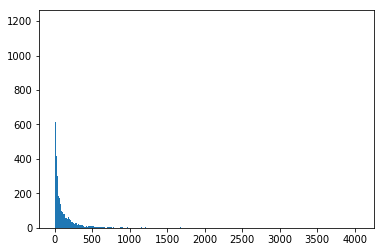

In [100]:
# e.g. calculate counts of reviews per business entity, and plot it
plt.hist(df_final['business_id'].value_counts(), bins = 400)
plt.show()

Text(0.5,1,'Rating Distribution')

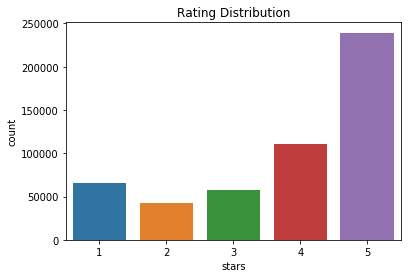

In [101]:
import seaborn as sns
sns.countplot(df_final['stars'])
plt.title('Rating Distribution')

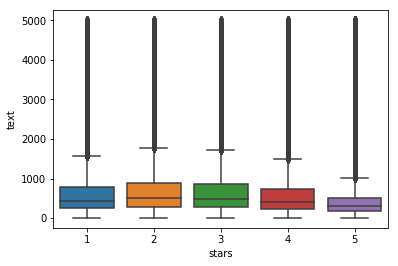

In [110]:
# Relationship between rating and length of review. 
sns.boxplot(x = 'stars', y = df_final['text'].apply(len), data = df_final)

## Save your preprocessed dataset to csv file

* Respect your laptop's hard work! You don't want to make it run everything again.

In [111]:
# Save to ./data/last_2_years_restaurant_reviews.csv for your next task
df_final.to_csv('./data/last_2_years_restaurant_reviews.csv', index = False, encoding = 'utf-8')